In [1]:
# 공통 모듈 임포트
import numpy as np
import os

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("그림 저장:", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [5]:
# 선형 회귀
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
# 랜덤 포레스트
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# 서포트 벡터 머신
svm_clf = SVC(gamma="scale", random_state=42)

# 다수결 분류기: 직접 투표 방식
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

# 다수결 분류기 학습
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# 분류기 별 정확도 측정
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__+':\t', accuracy_score(y_test, y_pred))

LogisticRegression:	 0.864
RandomForestClassifier:	 0.896
SVC:	 0.896
VotingClassifier:	 0.912


In [6]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

# 간접 투표 방식
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__+':\t', accuracy_score(y_test, y_pred))

LogisticRegression:	 0.864
RandomForestClassifier:	 0.896
SVC:	 0.896
VotingClassifier:	 0.92


In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.904


In [9]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.856


In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
  x1s = np.linspace(axes[0], axes[1], 100)
  x2s = np.linspace(axes[2], axes[3], 100)
  x1, x2 = np.meshgrid(x1s, x2s)
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)
  custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
  plt.contour(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
  if contour:
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
  plt.axis(axes)
  plt.xlabel(r"$x_1$", fontsize=18)
  plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

그림 저장: decision_tree_without_and_with_bagging_plot


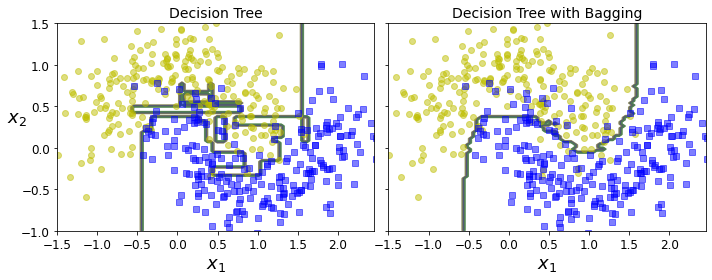

In [11]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

# 왼편 그래프
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)

# 오른편 그래프
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Tree with Bagging", fontsize=14)

plt.ylabel("")
save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

In [12]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=500,
    bootstrap=True,
    oob_score=True,
    random_state=40
)
bag_clf.fit(X_train, y_train)

bag_clf.oob_score_

0.8986666666666666

In [13]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [14]:
bag_clf.oob_decision_function_

array([[0.32275132, 0.67724868],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.09497207, 0.90502793],
       [0.31147541, 0.68852459],
       [0.01754386, 0.98245614],
       [0.97109827, 0.02890173],
       [0.97765363, 0.02234637],
       [0.74404762, 0.25595238],
       [0.        , 1.        ],
       [0.7173913 , 0.2826087 ],
       [0.85026738, 0.14973262],
       [0.97222222, 0.02777778],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.97837838, 0.02162162],
       [0.94642857, 0.05357143],
       [1.        , 0.        ],
       [0.01704545, 0.98295455],
       [0.39473684, 0.60526316],
       [0.88700565, 0.11299435],
       [1.        , 0.        ],
       [0.97790055, 0.02209945],
       [0.        , 1.        ],
       [0.99428571, 0.00571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.62569832, 0.37430168],
       [0.

## 랜덤포레스트

In [15]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators=500,
    max_leaf_nodes=16,
    n_jobs=-1,
    random_state=42
)

rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [16]:
bag_clf_auto = BaggingClassifier(
    DecisionTreeClassifier(max_features="auto", max_leaf_nodes=16, random_state=42),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

bag_clf_auto.fit(X_train, y_train)
y_pred_auto = bag_clf_auto.predict(X_test)

랜덤 포레스트 모델과 배깅 모델이 동일한 예측을 함.

In [17]:
np.sum(y_pred_auto == y_pred_rf) / len(y_pred)

1.0

### 엑스트라 트리

In [18]:
bag_clf_randAuto = BaggingClassifier(
    DecisionTreeClassifier(splitter="random",
                           max_features="auto",
                           max_leaf_nodes=16,
                           random_state=42),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

bag_clf_randAuto.fit(X_train, y_train)
y_pred_randAuto = bag_clf_randAuto.predict(X_test)

In [19]:
np.sum(y_pred_randAuto == y_pred_rf) / len(y_pred)

0.968

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

extra_clf = ExtraTreesClassifier(
    n_estimators=500,
    max_leaf_nodes=16,
    n_jobs=-1,
    random_state=42
)

extra_clf.fit(X_train, y_train)
y_pred_extra = extra_clf.predict(X_test)

In [21]:
np.sum(y_pred_randAuto == y_pred_extra) / len(y_pred)

1.0

### 특성 중요도

In [22]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
  print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [23]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


RandomForestClassifier(random_state=42)

그림 저장: mnist_feature_importance_plot


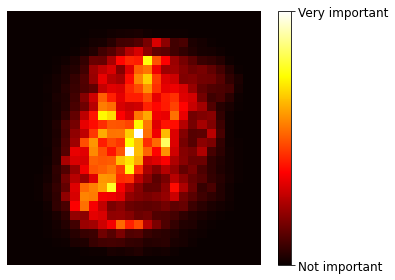

In [24]:
def plot_digit(data):
  # 28x28 사이즈로 형태 변환
  image = data.reshape(28, 28)
  # 그림 그리기
  plt.imshow(image, cmap=mpl.cm.hot, interpolation="nearest")
  # 축은 사용하지 않음.
  plt.axis("off")

# 이미지 속성 중요도 색으로 표현
plot_digit(rnd_clf.feature_importances_)

# 색상의 중요도를 보여주는 참조용 막대그래프. 오른편에 위치.
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

save_fig("mnist_feature_importance_plot")
plt.show()